<a href="https://colab.research.google.com/github/tejasvee98/MA471-Survival-Analysis/blob/main/Polynomial%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Approximating Survival Function using Polynomial Regression**

## **What is an Actuarial Life Table?**

An actuarial life table (also called mortality table) is a table that shows the probability of a person at a certain age dying before their next birthday.

**Terms:**

$ l(t) $ : The number of persons surviving to exact age t.​

$ d(t) $ : The number of deaths between exact ages t and t+1.​

$ q(t) $: The probability that a person of exact age t will die within one year.

**Calculation of Actuarial​ Table**

Suppose a number $ l(0) $ of individuals born simultaneously were taken and followed until death.​

$ d(t) = l(t) - l(t+1)​ $

$ q(t) = 1 - (l(t+1) / l(t))$​

$= (l(t) - l(t+1)) / l(t)​$

$ = d(t) / l(t) $

**Formulae:**

$ F(t) $: The probability that a person dies at or before age t.​

$ S(t)$ : The probability that a person survives to exact age t.​

$ F(t) = F(t-1) + (1 – F(t-1))*q(t-1) $​

$ S(t) = 1 – F(t) $

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
url='https://raw.githubusercontent.com/tejasvee98/MA471-Survival-Analysis/main/MA471_data.csv'
df = pd.read_csv(url)
age=df['Age']
S=df['S']
df.head(10)

,Age,Mortality rate,F,S
0,14,0.000713,0.000000,1.000000
1,15,0.000770,0.000713,0.999287
2,16,0.000823,0.001482,0.998518
3,17,0.000873,0.002304,0.997696
4,18,0.000919,0.003175,0.996825
5,19,0.000961,0.004091,0.995909
6,20,0.000999,0.005048,0.994952
7,21,0.001033,0.006042,0.993958
8,22,0.001063,0.007069,0.992931
9,23,0.001090,0.008125,0.991875


## **Method 1: Polynomial Fitting**

Fitting attempts to determine the strength and character of the relationship between one dependent variable and a series of other variables. Here we are trying to estimate the relationship between age and S.​

Polynomial Fitting is a form of fitting in which the relationship between the independent variable and dependent variable is modeled as an nth degree polynomial.​

numpy.polyfit(x, y, deg) fits a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0. Here, we pass x as df['Age'] and y as df['S']. We will increase deg till we find a close fit.​

**numpy.poly1d(v)** is a one-dimensional polynomial class used to encapsulate “natural” operations on polynomials

In [ ]:
#using polynomial fitting of degree 1
def fit_polynomial(deg):
  survival_func=np.poly1d(np.polyfit(age,S,deg))
  #we are plotting the original survival curve from the acturial data and the survival curve from polynomial fitting
  plt.plot(age,S,'--')
  plt.plot(age,survival_func(age))
  plt.legend(['Actual Data','Estimated Polynomial'])
  tit="Degree="+str(deg)
  plt.title(tit)
  return survival_func

 **Probability of survival using Polynomial Regression**
We are using the concept of conditional probability. Conditional probability is a measure of the probability of an event occurring — given that another event has occurred.

$P(A | B) = \frac{P(A \cap B)}{P(B)}$

In [ ]:
def result(survival_func,deg):
  print("Prob of surviving another three months if Prof Arabin has survived till 60 for polynomial fitting of degree {} is :".format(deg))
  print((survival_func(60.25)/survival_func(60)))

**Error in Polynomial Regression**

We are using Root Mean Squared Error as the measure of error. It is equal to the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. RMSE is a measure of how spread out these residuals are. In other words, it tells how concentrated the data is around the line of best fit.

$ RMSE = \sqrt{ {\frac{\sum_{i=1}^{N} {(Predicted_i - Actual_i)}^2}{N}}} $


In [ ]:
def error(survival_func,deg):
  squaredDiff = np.square(pd.Series(survival_func(age))-S)
  RMSerror=np.sqrt(np.sum(squaredDiff)/S.size)
  print("The root mean square error in the calculation for polynomial fitting of degree {} is :".format(deg))
  print(RMSerror)

Prob of surviving another three months if Prof Arabin has survived till 60 for polynomial fitting of degree 1 is :
0.995120384891185
The root mean square error in the calculation for polynomial fitting of degree 1 is :
0.15230333767973495


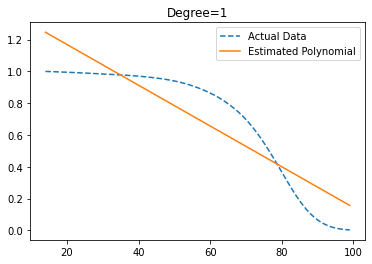

In [ ]:
#using polynomial fitting of degree 1
survival_func=fit_polynomial(1)
result(survival_func,1)
error(survival_func,1)

As we can clearly see, a polynomial of degree 1 is a very bad estimate for the survival function. Let's increase the degree and see what happens.

Prob of surviving another three months if Prof Arabin has survived till 60 for polynomial fitting of degree 3 is :
0.9955712235912281
The root mean square error in the calculation for polynomial fitting of degree 3 is :
0.051320033569735905


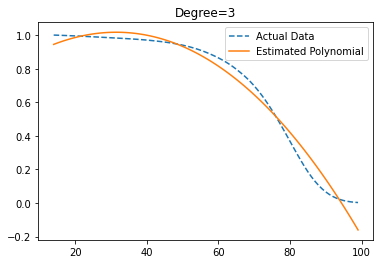

In [ ]:
#using polynomial fitting of degree 3
survival_func=fit_polynomial(3)
result(survival_func,3)
error(survival_func,3)

This seems better! Let's further increase the degree and see what happens.

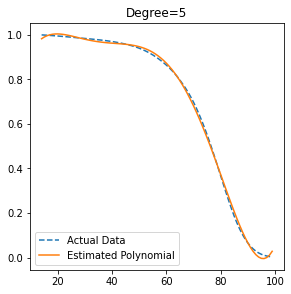

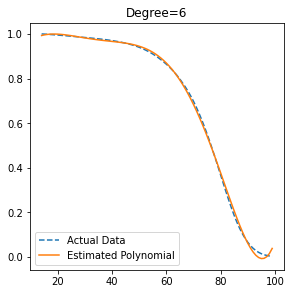

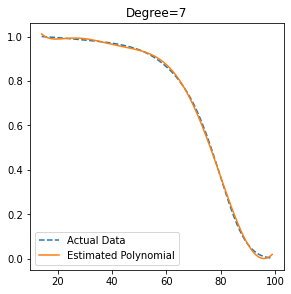

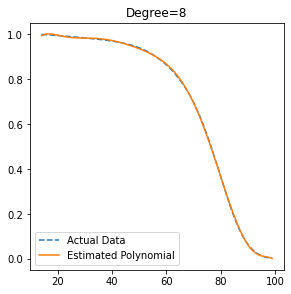

In [ ]:
for i in range(5,9):
  fig = plt.figure(figsize=(10,10))
  fig.add_subplot(2,2,i-4)
  survival_func=fit_polynomial(i)

As we can clearly see, by increasing the polynomial degree we can get a pretty good approximation for our survival Function. Let's see the results we get for using a polynomial of degree 8.

Prob of surviving another three months if Prof Arabin has survived till 60 for polynomial fitting of degree 8 is :
0.9970049386404206
The root mean square error in the calculation for polynomial fitting of degree 8 is :
0.00306263838416981


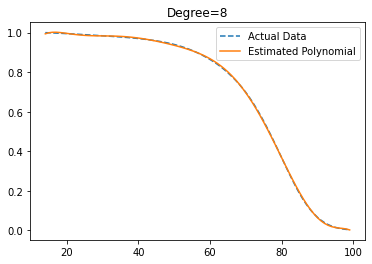

In [ ]:
survival_func=fit_polynomial(8)
result(survival_func,8)
error(survival_func,8)